#### About Dataset
Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

Source: https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

In [41]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [42]:
# Importing the dataset
data = pd.read_csv('diabetes.csv')
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
698,4,127,88,11,155,34.5,0.598,28,0
355,9,165,88,0,0,30.4,0.302,49,1
317,3,182,74,0,0,30.5,0.345,29,1
611,3,174,58,22,194,32.9,0.593,36,1
642,6,147,80,0,0,29.5,0.178,50,1
417,4,144,82,32,0,38.5,0.554,37,1
192,7,159,66,0,0,30.4,0.383,36,1
20,3,126,88,41,235,39.3,0.704,27,0
248,9,124,70,33,402,35.4,0.282,34,0
764,2,122,70,27,0,36.8,0.340,27,0


### Exploring data

In [43]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above summary statistics, we observe that several features have a minimum value of 0, which is not realistic for certain physiological measurements. Specifically, the features:
- Glucose, 
- Blood Pressure
- Skin Thickness
- Insulin and 
- BMI 

all have a minimum value of 0.

To further investigate and understand the distribution of these features, we will plot univariate graphs for each feature.

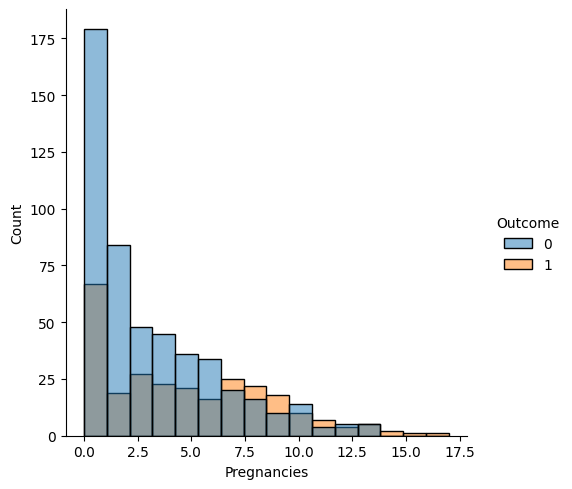

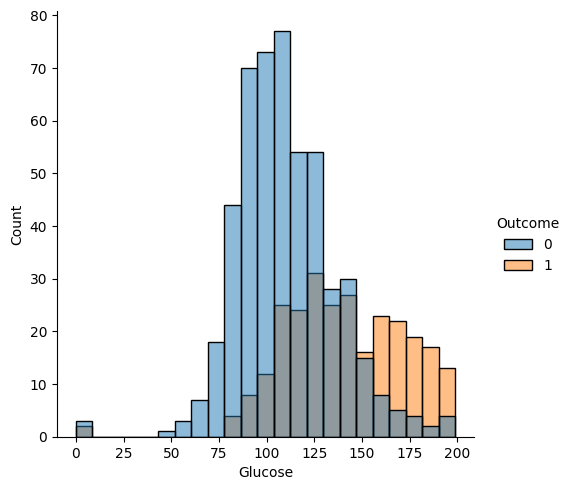

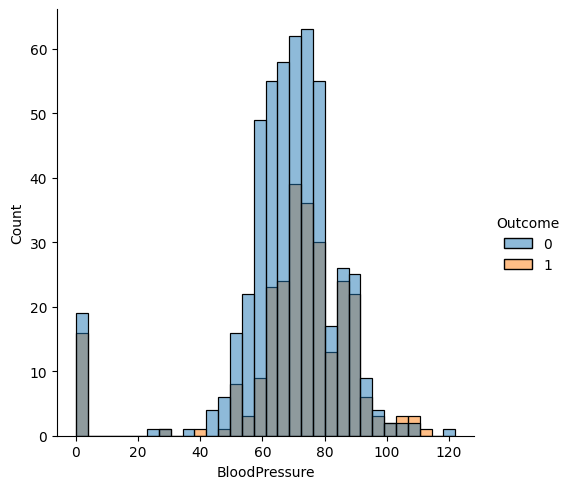

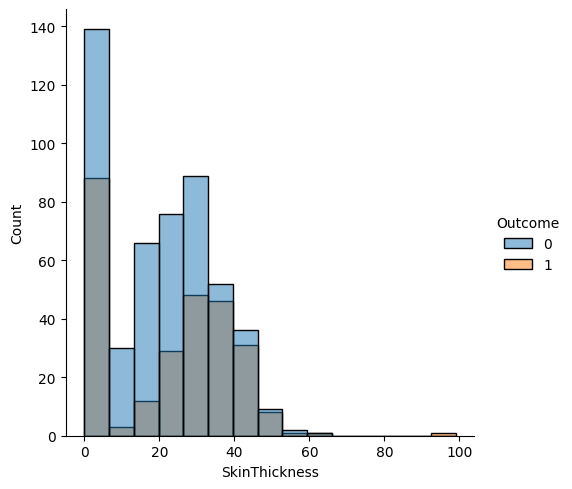

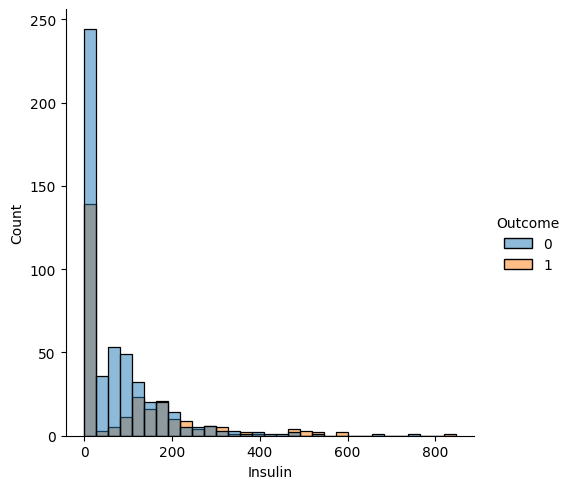

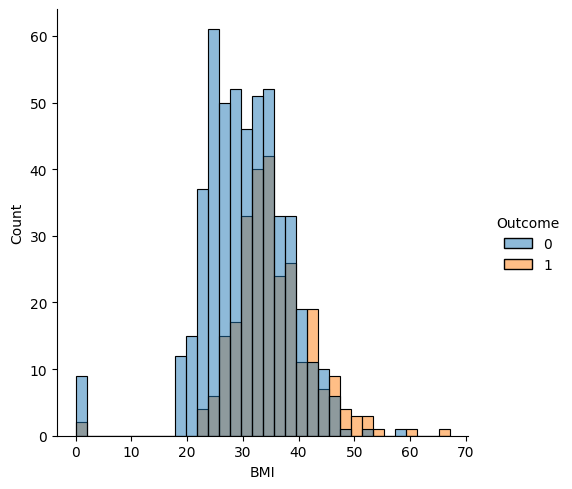

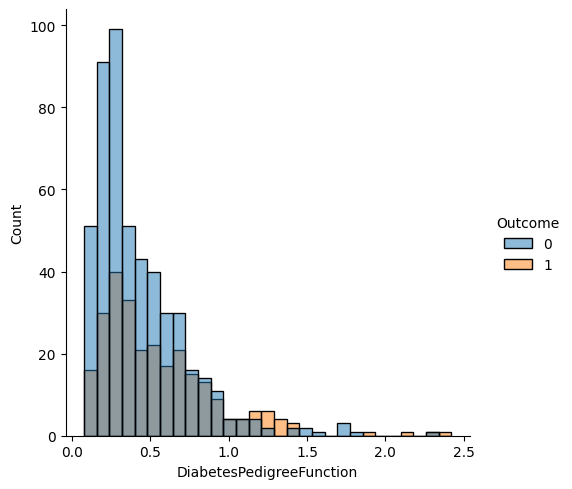

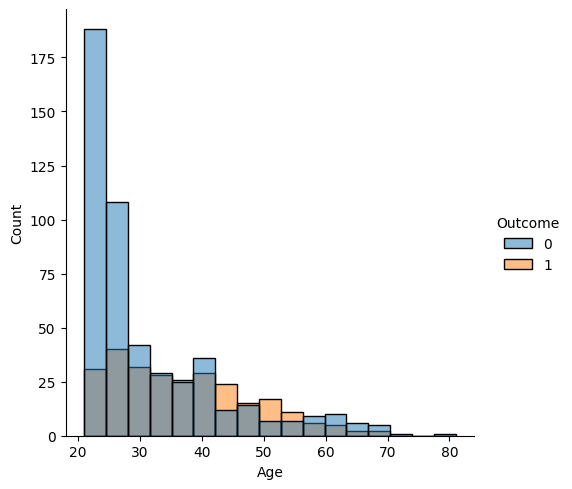

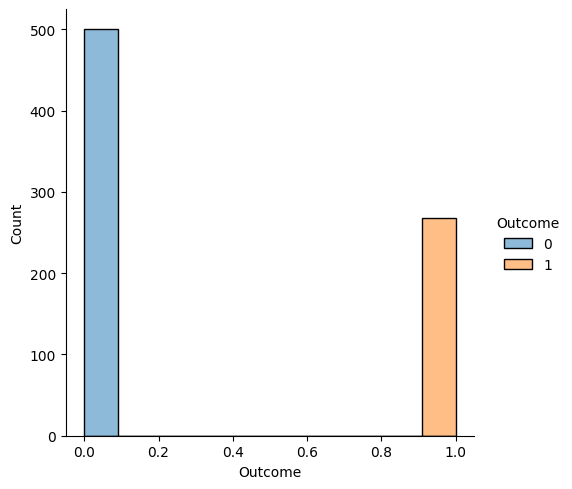

In [44]:
# Histograms for all columns
for column in data.columns:
    sns.displot(data, x=column,hue='Outcome')
    plt.show()
    




From the last plot, we can see that the number of patients who are not diabetic is significantly higher than the number of patients who are diabetic. This indicates that the dataset is imbalanced and biased towards the non-diabetic class.

### Data cleaning

We know that we have some 0 values, let's transform them in NaN values.

In [45]:
# Transforming zero values to NaN, but without the column 'Outcome'
data_copy = data.copy()

data = data.replace(0, np.nan)

# Checking for missing values
print(data.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [46]:
# Checking for duplicates
print(data.duplicated().sum())

0


KNNImputer imputes the missing values by considering the k-nearest neighbors of the datapoint being imputed. This method often provides better estimates as it leverages the similarity in the dataset.

In [47]:
from sklearn.impute import KNNImputer

In [48]:
# Separating the 'Outcome' column to prevent it from being transformed
outcome_column = data_copy['Outcome']
data_without_outcome = data.drop(columns=['Outcome'])

# Applying KNNImputer only to the other columns
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data_without_outcome)

# Replacing the original data with the imputed data
data_imputed = pd.DataFrame(imputed_data, columns=data_without_outcome.columns)

# Adding the 'Outcome' column back
data_imputed['Outcome'] = outcome_column

# Verifying that there are no more missing values in the other columns
print(data_imputed.isnull().sum())
data = data_imputed

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


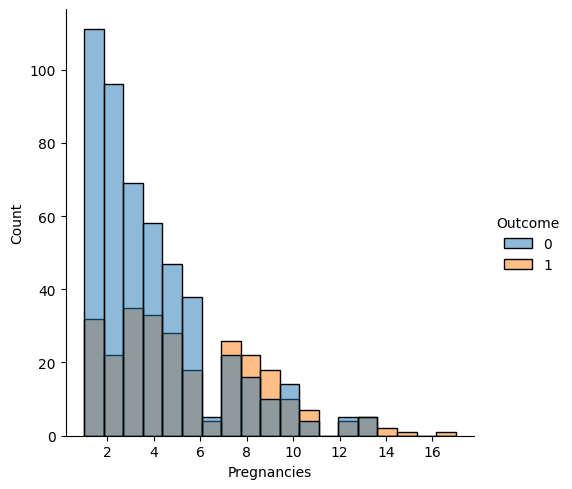

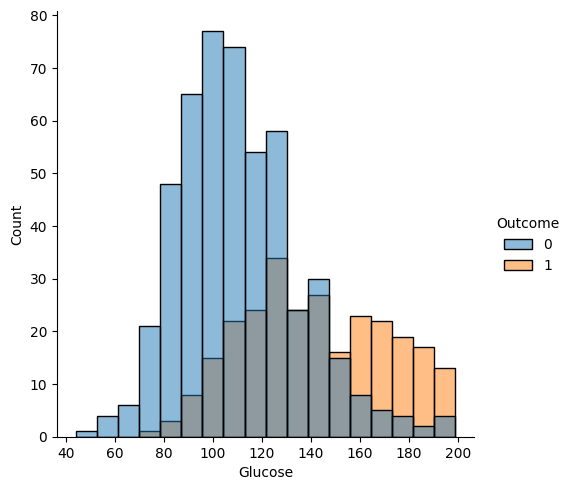

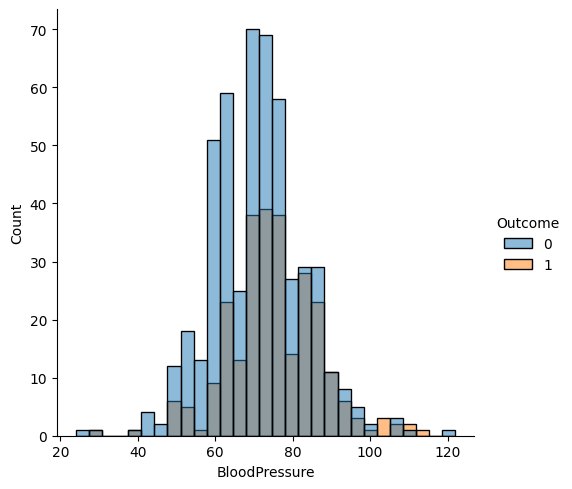

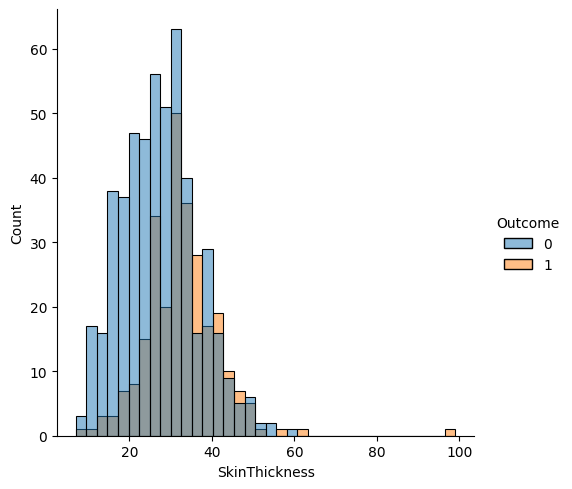

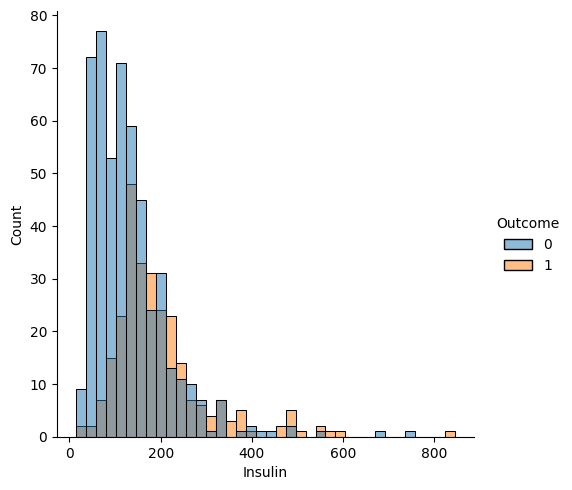

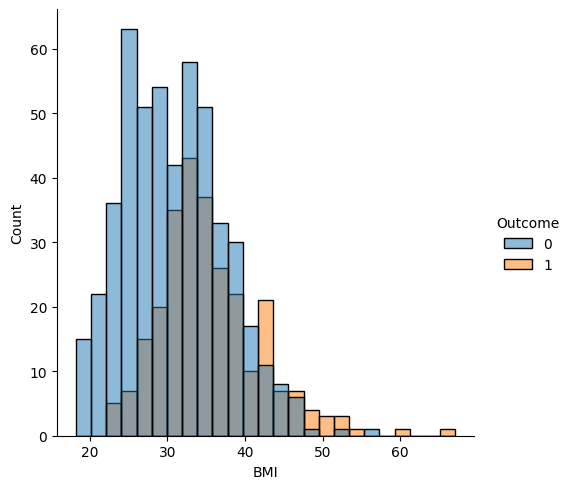

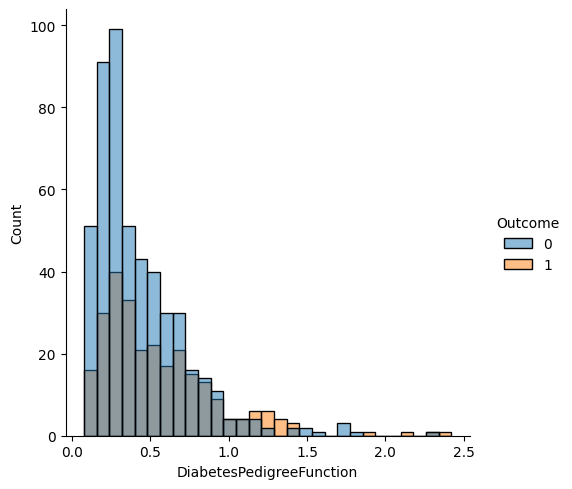

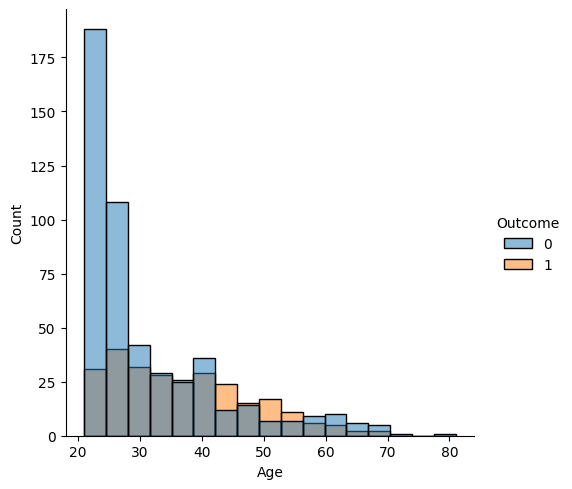

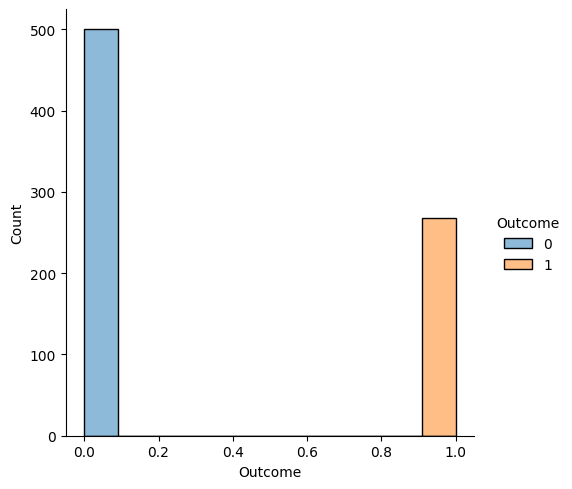

In [49]:
# Let's chech univariate analysis now

for column in data.columns:
    sns.displot(data, x=column,hue='Outcome')
    plt.show()

### Corelation using heatmap

<Axes: >

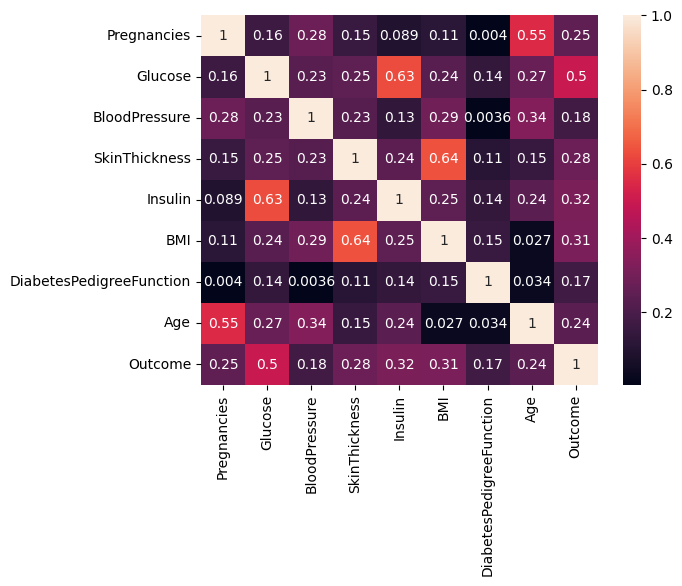

In [50]:
sns.heatmap(data.corr(), annot=True)

We can see that there is a certain corelation with all the features, but highest corelation is with Glucose, Insulin and BMI.

<Axes: xlabel='BMI', ylabel='Glucose'>

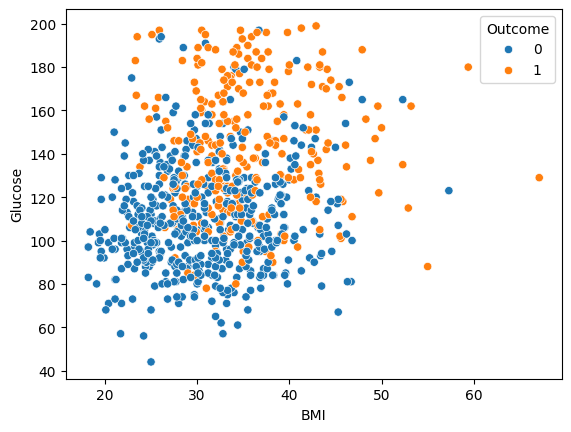

In [51]:
sns.scatterplot(x='BMI', y='Glucose', data=data, hue='Outcome')

The graph indicates that as BMI rises, glucose levels also increase, which in turn elevates the likelihood of a patient developing diabetes.

<Axes: xlabel='BMI', ylabel='SkinThickness'>

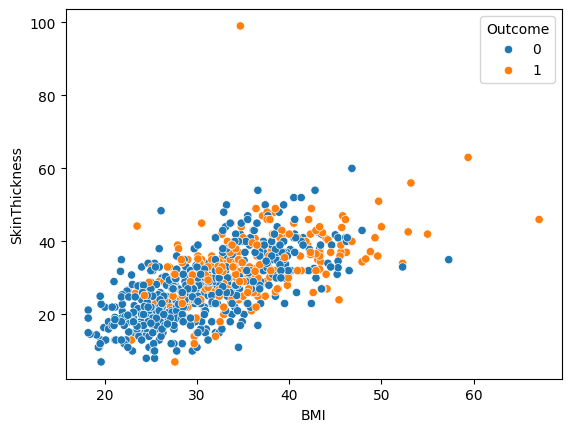

In [52]:
sns.scatterplot(x='BMI', y ='SkinThickness', data=data, hue='Outcome')

From the abow plot, we can see that BMI and SkinThickness are directly correlated with each other.
Therefore, we can remove one of them.

<Axes: xlabel='Glucose', ylabel='Insulin'>

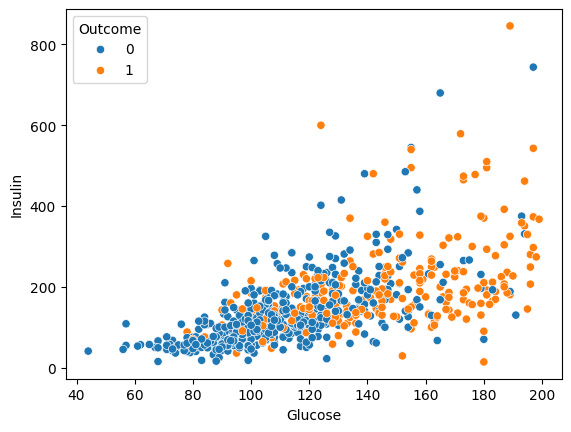

In [53]:
sns.scatterplot(x= 'Glucose', y='Insulin', data=data, hue='Outcome')

In the above plot, we can see that when Glucose is higher, Insuline level is also higher.

And when Glucose is higher, there is a big possitive probability that the patient is diabetic

<Axes: xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

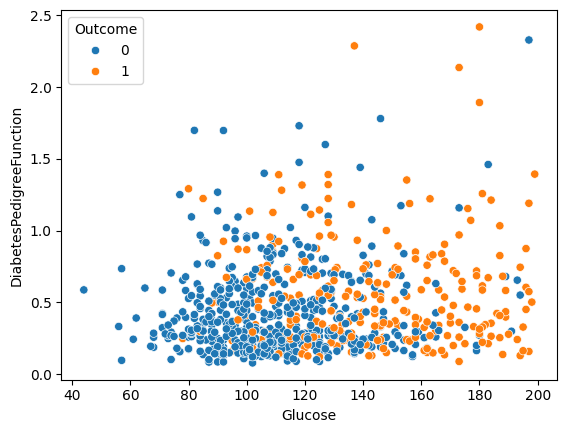

In [54]:
sns.scatterplot(x= 'Glucose', y='DiabetesPedigreeFunction', data=data, hue='Outcome')

DiabetesPedigreeFunction is not really correlated to other features or the 'Outcome'.

<Axes: xlabel='Age', ylabel='Glucose'>

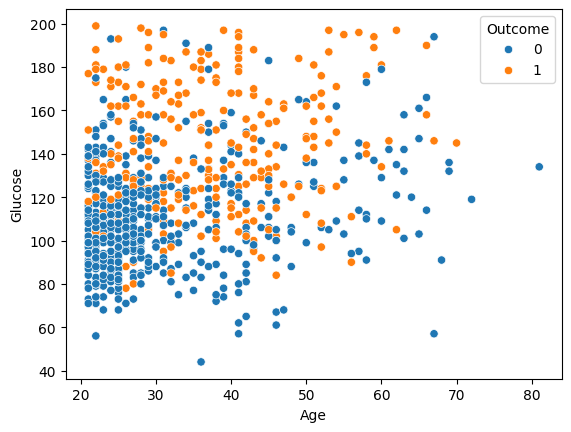

In [57]:
sns.scatterplot(x= 'Age', y='Glucose', data=data, hue='Outcome')

In the last plot we can see that usually youg patients with lower Glucose levels usually don't have diabetes.

### Model - Random Forest Classifier
Random Forest Classifier is a popular model that can be used for classification tasks.

In [66]:
from sklearn.ensemble import RandomForestClassifier

def RandomForest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    print('Random Forest accuracy:', accuracy)
    return accuracy



In [62]:
copy_data = data.copy()
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 42 because it is the answer to life, the universe, and everything

In [67]:
# predicting with random forest
RandomForest(X_train, X_test, y_train, y_test)

Random Forest accuracy: 0.7662337662337663


0.7662337662337663

### First result
First result has the accuracy of just 76.62%, which is not the best result.

We can try to improve it by changing the parameters of the model, for example by removing some features.

We can try to remove "DiabetesPedigreeFunction","SkinThickness","Insulin","Pregnancies", this features doesnot have a high correlation with th outcome and some of them have just a corelation with another features.

In [ ]:
# Removing some of the features
